**Homework 5**

(1) In this part, we will predict the number of applications received
using the other variables in the $\it{College}$ data set.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error 

Load the 'College.csv' data set

In [2]:
df = pd.read_csv('College.csv')
df.head(5)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [3]:
# Checking if there is any missing values in dataset due to data corruption
df.isnull().sum().sum()

0

(a) Split the data set into a training set and a test set.

In [4]:
# drop the columns we don't use, and change categorical variables to dummy variables
df = df.drop("Unnamed: 0",axis=1)
df = pd.get_dummies(df)

# define dataset
X = df.drop('Apps',axis=1)
y = df['Apps']

# scale the feature, Use StandardScaler method
scaler = preprocessing.StandardScaler()
X_scaler = scaler.fit_transform(X)

# Split the Training and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=5)

(b) Fit a linear model using least squares on the training set, and
report the test error obtained.

In [5]:
# Create a linear model and fit it using training dataset and evaluate it using testing dataset
# calculate the R^2 and RMSE of the model

model = LinearRegression().fit(X_train, y_train)
score = model.score(X_train,y_train)
print('R^2 score for linear model is {:.2f}'.format(score))
prediction = model.predict(X_test)
RMSE_linear = np.sqrt(mean_squared_error(y_test,prediction)) 
print('RMSE for linear model is {:.2f}'.format(RMSE_linear))

R^2 score for linear model is 0.93
RMSE for linear model is 1406.24


(c) Fit a ridge regression model on the training set, with $\lambda$ chosen
by cross-validation. Report the test error obtained.

In [6]:
# Create a ridge model and fit it using training dataset and evaluate it using testing dataset
# calculate the R^2 and RMSE of the model

model = RidgeCV(alphas=(0.1, 1.0, 10), cv=5)
model.fit(X_train, y_train)
score = model.score(X_train,y_train)
print('R^2 Score for ridge model is {:.2f}'.format(score))
prediction = model.predict(X_test)
RMSE_ridge = np.sqrt(mean_squared_error(y_test,prediction)) 
print('RMSE for ridge regression model is {:.2f}'.format(RMSE_ridge))

R^2 Score for ridge model is 0.93
RMSE for ridge regression model is 1423.25


(d) Fit a lasso model on the training set, with $\lambda$ chosen by crossvalidation.
Report the test error obtained, along with the number
of non-zero coefficient estimates.

In [7]:
# Create a Lasso model and fit it using training dataset and evaluate it using testing dataset
# calculate the R^2 and RMSE of the model

model = LassoCV(cv=5, random_state=0)
model.fit(X_train,y_train)
score = model.score(X_train,y_train)
print('R^2 Score for Lasso model is {:.2f}'.format(score))
prediction = model.predict(X_test)
RMSE_lasso = np.sqrt(mean_squared_error(y_test,prediction)) 
print('RMSE for Lasso regression model is {:.2f}'.format(RMSE_lasso))
print('Number of non-zero coefficient estimates:', np.sum(model.coef_ != 0))

R^2 Score for Lasso model is 0.93
RMSE for Lasso regression model is 1412.78
Number of non-zero coefficient estimates: 15


(e) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there a significant differnce among the test errors resulting from these three approaches?

$\textbf{Answer}$:  
The $R^2$ score of all three medel is 0.93, it is close to 1, which means the model prediction accuracy is good.  
The $R^2(=0.93)$ and RMSE(=1406.24, 1423.25, 1412.78 respectively) of the three model is very close, so there is no a significant differnce among the test errors resulting from these three approaches.

(2) In this part, we will use logistic regression and KNN classifier on the *Weekly* dataset. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import statsmodels.api as sm 
from patsy import dmatrices

%matplotlib inline

Load the 'Weekly.csv' data set.

In [9]:
df = pd.read_csv('Weekly.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [10]:
# Checking if there is any missing values in dataset due to data corruption
df.isnull().sum().sum()

0

(a) Produce some numerical and graphical summaries of the *Weekly*
data. Do there appear to be any patterns?

In [11]:
df[['Lag1','Lag2','Lag3','Lag4','Lag5','Today']].describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,0.149899
std,2.357013,2.357254,2.360502,2.360279,2.361285,2.356927
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,-1.154000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,0.241000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,1.405000
max,12.026000,12.026000,12.026000,12.026000,12.026000,12.026000


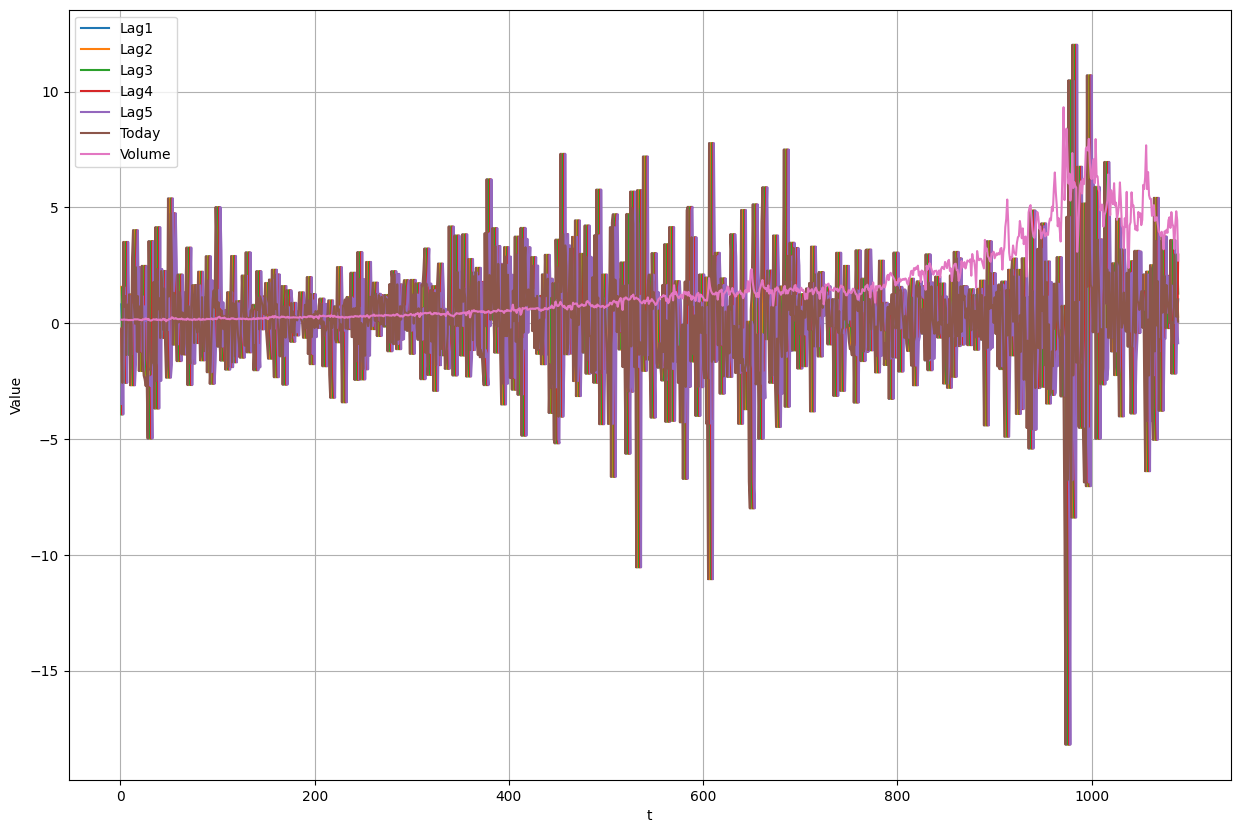

In [12]:
fig = plt.figure(figsize = [15,10])
r = np.arange(1,1090)
plt.plot(r,df['Lag1'],label='Lag1')
plt.plot(r,df['Lag2'],label='Lag2')
plt.plot(r,df['Lag3'],label='Lag3')
plt.plot(r,df['Lag4'],label='Lag4')
plt.plot(r,df['Lag5'],label='Lag5')
plt.plot(r,df['Today'],label='Today')
plt.plot(r,df['Volume'],label='Volume')
# plt.plot(r,df['Direction'],label='Direction')
plt.xlabel('t')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

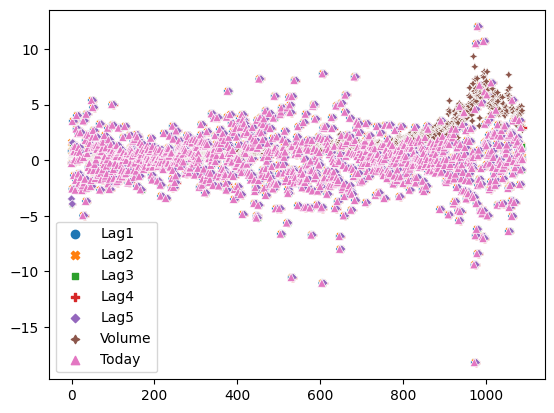

In [13]:
data = df.drop(['Year','Direction'],axis=1)
sns.scatterplot(data=data,sizes=(20, 1100))
plt.show()

$\textbf{Pattern1}$:  
- Columns ('Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today') share approximate Maximum, Minimum, Mean of the values，Standard deviation and 25%(50%,75%) upper percentiles.
- Columns ('Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Today') share approximate distrubution through year.
- column('Volume') distribution is different from others.

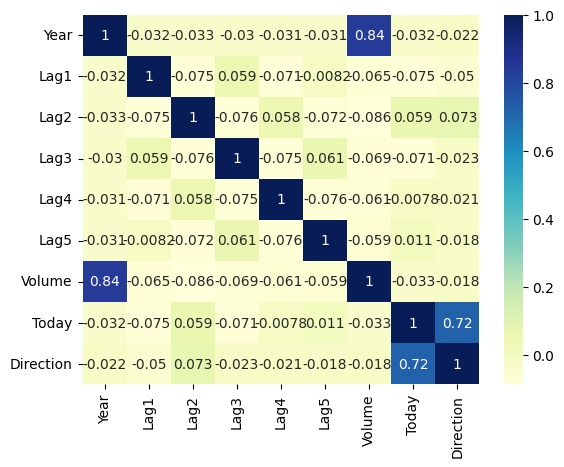

In [14]:
# Change categorical variables quantitative variables
df.replace('Down', 0, inplace=True)
df.replace('Up', 1, inplace=True)

ax = sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

$\textbf{Pattern2}$:   
- corr('Volume','Year')=0.84, it shows a strong positive linear relationship between the value of 'Volume'and 'Year'.  
- corr('Today','Direction')=0.72, it also shows a relative strong positive linear relationship between the value of 'Today' and 'Direction'.  
- correlation between any other two different variable is approximate 0, which indicates almost no relationship between these two variables.

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [15]:
# Change categorical variables quantitative variables
# df.replace('Down', 0, inplace=True)
# df.replace('Up', 1, inplace=True)

# Training dataset
X = df.drop(['Year','Today','Direction'],axis=1)
y = df['Direction']

# Create a logistic regression model and fit it
y, X = dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df, return_type='dataframe')
# Logit_model=sm.Logit('y~Lag1+lag2+Lag3+Lag4+Lag5+Volume')
Logit_model=sm.Logit(y,X)
result=Logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                0.006580
Time:                        08:14:10   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

$\textbf{Answer}$: 
All the coef are very approximate to 0, that means none of the predictors here appear to be statistically significant to the value of Direction.

(c) Fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [16]:
# Training dataset
dataframe = pd.DataFrame(df)
df1 = dataframe[dataframe['Year'] < 2009]
X1 = df1['Lag2'].to_numpy()
y1 = df1['Direction']

# Create a Logistic model and fit it using training dataset
model = LogisticRegression(random_state=0)
model.fit(X1.reshape(-1, 1), y1)

# Testing dataset 
df2 = dataframe[(dataframe['Year'] > 2008)]
X_test = df2['Lag2'].to_numpy()
y_test = df2['Direction']

# Prediction and Accuracy classification score
prediction = model.predict(X_test.reshape(-1, 1))
accuracy = accuracy_score(y_test, prediction)
print('The overall fraction of correct predictions for the data from 2009 and 2010 is {}.'.format(accuracy))

The overall fraction of correct predictions for the data from 2009 and 2010 is 0.625.


(d) Repeat (c) using KNN classifier with *K*=1 and *K*=10.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Creare KNN classifier for K=1, fit it and generate Prediction and Accuracy classification score
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(X1.reshape(-1, 1), y1) 
KNN_prediction = KNN_model.predict(X_test.reshape(-1, 1))
accuracy = accuracy_score(y_test, KNN_prediction)
print('When k=1, the overall fraction of correct predictions Using KNN classifier for the data from 2009 and 2010 is {:.3f}.'.format(accuracy))

# Creare KNN classifier for K=10, fit it and generate Prediction and Accuracy classification score
KNN_model2 = KNeighborsClassifier(n_neighbors=10)
KNN_model2.fit(X1.reshape(-1, 1), y1) 
KNN_prediction2 = KNN_model2.predict(X_test.reshape(-1, 1))
accuracy = accuracy_score(y_test, KNN_prediction2)
print('When k=10, the overall fraction of correct predictions Using KNN classifier for the data from 2009 and 2010 is {:.3f}.'.format(accuracy))

When k=1, the overall fraction of correct predictions Using KNN classifier for the data from 2009 and 2010 is 0.500.
When k=10, the overall fraction of correct predictions Using KNN classifier for the data from 2009 and 2010 is 0.567.
